# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import scipy.stats
import math

df = pd.read_csv('data/human_body_temperature.csv')

In [10]:
# Your work here.
df.count()

temperature    130
gender         130
heart_rate     130
dtype: int64

1. Is the distribution of body temperatures normal? 
Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population. 
Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test 

A. See below the sample distribution and the probability distribution to check for normality and from the distribution the data is distributed normally

In [9]:
#Calculate the mu, std to plot PDF
temp_sorted = df.temperature.sort_values()
mu, std = mu, std = temp_sorted.mean(),temp_sorted.std()
pdf= norm.pdf(temp_sorted,mu,std)

C:\Users\GG\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
No handles with labels found to put in legend.


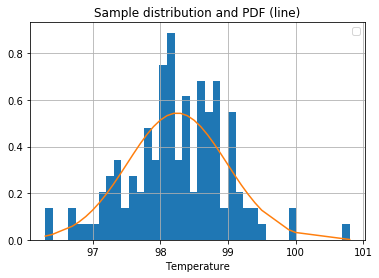

In [28]:
# Graphical EDA -histogram to check for distribution. The sample data appears to be normally distributed. 
import matplotlib.pyplot as plt

_ = plt.hist(df['temperature'], bins = 40, normed = True, stacked = True)
_ = plt.plot(temp_sorted, pdf)
plt.xlabel('Temperature')
plt.title('Sample distribution and PDF (line)')
plt.legend()
plt.grid()
plt.show()

2. Is the sample size large? Are the observations independent? 
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply. 

A. Yes the samples are large enough to assume normality. CLT suggests a minimum sample size of 30 in order for normality of the population mean. The notes in the dataset mentions the observations are random samples and therefore they are independent of each other. Also, the sample randomness is one of the requirement of the normal distribution.
Also, test for normality at alpha =0.05 below yileds p-value ~ 0.26 > alpha=0.05. Therefore, samples are normally distributed.

In [22]:
k2,p=scipy.stats.normaltest(temp_sorted)
print('Normality p-value:', p)

Normality p-value: 0.2587479863488212


3. Is the true population mean really 98.6 degrees F? 
First, try a bootstrap hypothesis test. 
A. The null hypothesis (H0):  Avg_Body_Temp = 98.6F and Alternate Hypothesis (H1): Avg_Body_Temp != 98.6F
From the bootstrap hypothesis test, the mean normal temperature after 10000 replicates is 98.25 and the 99% confidence interval is still below 98.6. Also, p-value= 0.0 < alpha=0.05 so we reject the null hypothesis that mean normal body temp. is 98.6

Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? 
A. Since we are evaluating the entire population mean normal temperature, we use one-sample frequentist statistical testing. If we were to evaluate the mean temperatures between males and females then we use two-sample testing 

In this situation, is it appropriate to use the 𝑡 or 𝑧 statistic? 
A. Conditions for using t-statistc: 
    i. population SD is unknown 
    ii. sample size < 30
    In this case, we do not know the population SD and also the sample size is > 30. Therefore we should use Z- statistic
  From the calculations below Z-score is 5.4 which is very high. Therefore the probablity of mean normal temperature of 98.6 is very low and almost 0.0.
  
Now try using the other test. How is the result be different? Why? 
A. Cannot use t-statistcs since population SD is not known and sample size is large.

In [19]:
mu = np.mean(df['temperature'])
print('Sample mean:', mu)

Sample mean: 98.24923076923078


In [17]:
# Check bootstrapping method to find the sample mean
# bootstrap replicate for 1 replicate
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

# bootstrap replicates for N size
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

bs_replicates = draw_bs_reps(df['temperature'], np.mean, 10000)
print('Replicate Mean:', np.mean(bs_replicates))
confidence_interval = np.percentile(bs_replicates,[2.5, 97.5])
print ('95% confidence Interval:', confidence_interval)
p = sum(bs_replicates >= 98.6)/ len(bs_replicates)
print ('p-value:', p)

Replicate Mean: 98.24967223076924
95% confidence Interval: [98.12384615 98.37386538]
p-value: 0.0


In [25]:
# Frequentist statistical testing - z-statistcs
import scipy.stats as st
population_mu = 98.6
sample_mean_temp = np.mean(df['temperature'])
sample_size = len(df['temperature'])
sample_std = np.std(df['temperature'])
z = (sample_mean_temp - population_mu) / (sample_std/ np.sqrt(sample_size))
print('Z-score:', z)
p_values = st.norm.cdf((z))*2 #two-sided
print('P-value:', p_values)

Z-score: -5.475925202078116
P-value: 4.3523151658821886e-08


4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 
Which one is the correct one to use? 
What do you notice? What does this tell you about the difference in application of the 𝑡 and 𝑧 statistic? 


A. t-Statistc is based on the DOF (n-1) and confidence interval to calculate probability and is fixed and therefore is the correct test.
z-statistic changes everytime a new sample of 10 is chosen.
If we chose t-statistc with alpha=0.05 then we can reject null hypothesis (H0: mu=98.6) but cannot do so with z-statistic

In [42]:
# Frequentist statistical testing - z-statistcs
import scipy.stats as st
population_mu = 98.6
sample = np.random.choice(df['temperature'], 10)
sample_mean_temp = np.mean(sample)
sample_size = 10
sample_std = np.std(sample)
z = np.mean((sample_mean_temp - population_mu) / (sample_std/np.sqrt(sample_size)))
print('sample_mean:', sample_mean_temp)
print('Z-score:', z)
p_values = st.norm.pdf((z)) 
print('P-value from Z- test:',  p_values)
print('P-Value from T-test:', st.norm.pdf(2.262))

sample_mean: 98.28
Z-score: -1.4766784404040867
P-value from Z- test: 0.13409213490529096
P-Value from T-test: 0.030891922617813167


5.At what temperature should we consider someone's temperature to be "abnormal"? 
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach. 
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. 

A. Answers are below for both bootstrap method and the frequentist methods

In [40]:
# bootstrap approach

std = draw_bs_reps(df['temperature'], np.std, 10000)
three_sigma = 3* np.mean(std)
mean_temp = np.mean(draw_bs_reps(df['temperature'], np.mean, 10000))
low_abnormal_temp = mean_temp - three_sigma
high_abnormal_temp = mean_temp + three_sigma
print('BS_Abnormal temperature is below:', low_abnormal_temp)
print('BS_Abnormal temperature is above:', high_abnormal_temp)

#frequentist approach
frequentist_mean = np.mean(df['temperature'])
frequentist_std = np.std(df['temperature'])
Fq_low_abnormal = frequentist_mean - 3*frequentist_std
Fq_high_abnormal = frequentist_mean + 3*frequentist_std
print('Fq_Abnormal temperature is below:', Fq_low_abnormal)
print('Fq_Abnormal temperature is above:', Fq_high_abnormal )

#CI
se = (frequentist_mean - 98.6)/ frequentist_std 

CI_low = frequentist_mean - 1.96 * se
CI_high = frequentist_mean + 1.96 * se
print('Standard Error:', standard_error) 
print('95% CI:',CI_high, ',',CI_low )

BS_Abnormal temperature is below: 96.07250794749125
BS_Abnormal temperature is above: 100.42721559097028
Fq_Abnormal temperature is below: 96.05815743251567
Fq_Abnormal temperature is above: 100.44030410594588
Standard Error: -0.48027041116080765
95% CI: 97.30790076335559 , 99.19056077510596


6. Is there a significant difference between males and females in normal temperature? 
What testing approach did you use and why? 

A. Used bootsrapping method to calculate the mean body temperature for male and female. 
Null hypothesis (H0): mean_body_temp_male = mean_body_temp_female

Alternate hypothesis (Ha): mean_body_temp_male != mean_body_temp_female

Calculated the P-values for both groups and the probablity of the difference = 0. 
Since the p-values are small and the probablity of the difference_mean_body_temp not equal or less than 0, we reject the null hypothesis that both male and female have same mean body temperature. 

Write a story with your conclusion in the context of the original problem.
A. From this analysis, we conclude:
   1. Mean normal temperature != 98.6 
   2. Both men and women have lesser mean normal temperature than null hypothesis (H0: mean_temp = 98.6)
   3. Females have a higher normal temperatures than males.

In [9]:
m = np.mean(df[df['gender']=='M'].temperature)
print('Male_mean_temp:', m)
f = np.mean(df[df['gender']=='F'].temperature)
print('Female_mean_temp:', f)
diff = abs(m - f)
print('Difference_men_women:', diff)

Male_mean_temp: 98.1046153846154
Female_mean_temp: 98.39384615384613
Difference_men_women: 0.289230769230727


In [26]:
#bootstrap sampling of male and female body temp
male = df[df['gender']=='M'].temperature
bs_men = draw_bs_reps(male, np.mean, 10000)
print('Men Replicate Mean:', np.mean(bs_men))
men_CI = np.percentile(bs_men,[2.5, 97.5])
print ('95% confidence Interval Men:', men_CI)
pm = sum(bs_men >= 98.6)/ len(bs_men)
print ('p-value_male:', pm)
#female
female = df[df['gender']=='F'].temperature
bs_fem = draw_bs_reps(female, np.mean, 10000)
print('Women Replicate Mean:', np.mean(bs_fem))
fem_CI = np.percentile(bs_fem,[2.5, 97.5])
print ('95% confidence Interval Woman:', fem_CI)
pf = sum(bs_fem >= 98.6)/ len(bs_fem)
print ('p-value_female:', pf)

p1 = sum(bs_fem -bs_men)<=0/ len(bs_fem)
print('p-value diff:', p1)

Men Replicate Mean: 98.10427553846154
95% confidence Interval Men: [97.93384615 98.26769231]
p-value_male: 0.0
Women Replicate Mean: 98.39327353846153
95% confidence Interval Woman: [98.21384615 98.57076923]
p-value_female: 0.0116
p-value diff: False
